# South Lyon's Pumpkinfest and its relationship to vegetarianism

![alt text](pumpkin.png "Title")

Fun project, this is my first attempt to scrape data from the web!


South Lyon is a city in Oakland County in Michigan (United States), with a population of 11,746. One of the most traditional events in the city is the Pumpkinfest, held in September every year. The festival includes the Great Pumpkin & Fun Veggies contest. Given the interest on veggies, one could think that South Lyon has a high percentage of vegetarian people. In order to investigate that, I scraped the web to find:
- the number of vegetarian restaurants in South Lyon

This was then compared to the number of vegetarian restaurants in Rochester, a city in the same county with a similar population (13,035).

The data was scraped from the yelp reviews of vegetarian restaurants in [South Lyon](https://www.yelp.com/search?find_desc=Vegetarian+Restaurants&find_loc=South+Lyon%2C+MI+48178%2C+United+States) and [Rochester](https://www.yelp.com/search?find_desc=Vegetarian+Restaurants&find_loc=Rochester%2C+MI%2C+United+States).

Skills I learned in this project:
- webdata scrapping 
- data wrangling
- data visualisation

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
yelp_sl = pd.read_csv('yelp_veg_restaurants_SL.csv')
yelp_roc = pd.read_csv('yelp_veg_restaurants_ROC.csv')
yelp_roc.head()


,Title,css1m051bw,Data_field,css11bijt4,cssq7yb35,cssq7yb353,css16lklrv,raw__09f24__t4ezm,Tag
0,Ale Mary’s Beer Hall,Ale Mary’s Beer Hall,648.0,Sandwiches,Beer Bar,Vegan,"“We came here for the first time tonight, expe...",Outdoor seating,Delivery
1,1. The Meeting House,The Meeting House,423.0,American (New),American (Traditional),NaN,“This is the best restaurant in Rochester and ...,Outdoor seating,Takeout
2,2. Chomp,Chomp,281.0,American (Traditional),Delis,NaN,"“I love this place, it really has something fo...",Outdoor seating,Delivery
3,3. Pita Way Rochester,Pita Way Rochester,7.0,Mediterranean,Food Trucks,Sandwiches,“The food was delicious and healthy-my falafel...,Outdoor seating,Delivery
4,4. Rochester Bistro,Rochester Bistro,172.0,Wine Bars,Steakhouses,American (New),"“Came here with a group of 11, the staff and o...",Outdoor seating,Delivery


Create function to clean data scraped from yelp:

In [66]:
yelp_sl.head()

,Title,css1m051bw,Data_field,css11bijt4,cssq7yb35,cssq7yb353,css16lklrv,raw__09f24__t4ezm,Tag
0,Cinnaholic,Cinnaholic,(32 reviews),Vegan,Bakeries,Desserts,“Tried this place for the first time today and...,Outdoor seating,Delivery
1,1. Shimmy Shack,Shimmy Shack,(28 reviews),Vegan,Food Trucks,NaN,“LOVE LOVE LOVE!!! \n\nI first tried Shimmy Sh...,Outdoor seating,Takeout
2,2. La Marsa South Lyon,La Marsa South Lyon,(12 reviews),Mediterranean,Soup,Lebanese,“I am so glad healthy options are walking dist...,Outdoor seating,Delivery
3,3. Lyon Grill,Lyon Grill,(159 reviews),American (Traditional),Seafood,Steakhouses,“Very nice little surprise. I wish they had t...,Takeout,NaN
4,4. Fortuna Inn,Fortuna Inn,(85 reviews),Chinese,NaN,NaN,"“For such a small town as south Lyon, fortuna ...",Delivery,Takeout


In [67]:
def yelp_data_cleaning (df):
    df = df.rename(columns={df.columns[1]: 'restaurant_name', 
                            df.columns[2]: 'n_reviews',
                            df.columns[3]: 'classification1',
                            df.columns[4]: 'classification2', 
                            df.columns[5]: 'classification3',
                            df.columns[6]: 'first_review',
                            df.columns[7]: 'feature1',
                            df.columns[8]: 'feature2'}).dropna(subset = ['Title'])
    return df
    

In [68]:
yelp_sl = yelp_data_cleaning(yelp_sl)
yelp_sl['city'] = 'South Lyon'
yelp_sl.head()

,Title,restaurant_name,n_reviews,classification1,classification2,classification3,first_review,feature1,feature2,city
0,Cinnaholic,Cinnaholic,(32 reviews),Vegan,Bakeries,Desserts,“Tried this place for the first time today and...,Outdoor seating,Delivery,South Lyon
1,1. Shimmy Shack,Shimmy Shack,(28 reviews),Vegan,Food Trucks,NaN,“LOVE LOVE LOVE!!! \n\nI first tried Shimmy Sh...,Outdoor seating,Takeout,South Lyon
2,2. La Marsa South Lyon,La Marsa South Lyon,(12 reviews),Mediterranean,Soup,Lebanese,“I am so glad healthy options are walking dist...,Outdoor seating,Delivery,South Lyon
3,3. Lyon Grill,Lyon Grill,(159 reviews),American (Traditional),Seafood,Steakhouses,“Very nice little surprise. I wish they had t...,Takeout,NaN,South Lyon
4,4. Fortuna Inn,Fortuna Inn,(85 reviews),Chinese,NaN,NaN,"“For such a small town as south Lyon, fortuna ...",Delivery,Takeout,South Lyon


In [79]:
yelp_sl = yelp_sl.assign(n_reviews = lambda x: x['n_reviews'].str.extract('(\d+)'))
yelp_sl['n_reviews'] = pd.to_numeric(yelp_sl['n_reviews'])
yelp_sl.head()

,Title,restaurant_name,n_reviews,classification1,classification2,classification3,first_review,feature1,feature2,city
0,Cinnaholic,Cinnaholic,32,Vegan,Bakeries,Desserts,“Tried this place for the first time today and...,Outdoor seating,Delivery,South Lyon
1,1. Shimmy Shack,Shimmy Shack,28,Vegan,Food Trucks,NaN,“LOVE LOVE LOVE!!! \n\nI first tried Shimmy Sh...,Outdoor seating,Takeout,South Lyon
2,2. La Marsa South Lyon,La Marsa South Lyon,12,Mediterranean,Soup,Lebanese,“I am so glad healthy options are walking dist...,Outdoor seating,Delivery,South Lyon
3,3. Lyon Grill,Lyon Grill,159,American (Traditional),Seafood,Steakhouses,“Very nice little surprise. I wish they had t...,Takeout,NaN,South Lyon
4,4. Fortuna Inn,Fortuna Inn,85,Chinese,NaN,NaN,"“For such a small town as south Lyon, fortuna ...",Delivery,Takeout,South Lyon


In [111]:
yelp_roc = pd.read_csv('yelp_veg_restaurants_ROC.csv')
yelp_roc = yelp_data_cleaning(yelp_roc)
yelp_roc['city'] = 'Rochester'
yelp_roc.head()

,Title,restaurant_name,n_reviews,classification1,classification2,classification3,first_review,feature1,feature2,city
0,Ale Mary’s Beer Hall,Ale Mary’s Beer Hall,648.0,Sandwiches,Beer Bar,Vegan,"“We came here for the first time tonight, expe...",Outdoor seating,Delivery,Rochester
1,1. The Meeting House,The Meeting House,423.0,American (New),American (Traditional),NaN,“This is the best restaurant in Rochester and ...,Outdoor seating,Takeout,Rochester
2,2. Chomp,Chomp,281.0,American (Traditional),Delis,NaN,"“I love this place, it really has something fo...",Outdoor seating,Delivery,Rochester
3,3. Pita Way Rochester,Pita Way Rochester,7.0,Mediterranean,Food Trucks,Sandwiches,“The food was delicious and healthy-my falafel...,Outdoor seating,Delivery,Rochester
4,4. Rochester Bistro,Rochester Bistro,172.0,Wine Bars,Steakhouses,American (New),"“Came here with a group of 11, the staff and o...",Outdoor seating,Delivery,Rochester


In [112]:
dfs = [yelp_sl, yelp_roc]
yelp_merged = pd.concat(dfs)
yelp_merged.head()

,Title,restaurant_name,n_reviews,classification1,classification2,classification3,first_review,feature1,feature2,city
0,Cinnaholic,Cinnaholic,32.0,Vegan,Bakeries,Desserts,“Tried this place for the first time today and...,Outdoor seating,Delivery,South Lyon
1,1. Shimmy Shack,Shimmy Shack,28.0,Vegan,Food Trucks,NaN,“LOVE LOVE LOVE!!! \n\nI first tried Shimmy Sh...,Outdoor seating,Takeout,South Lyon
2,2. La Marsa South Lyon,La Marsa South Lyon,12.0,Mediterranean,Soup,Lebanese,“I am so glad healthy options are walking dist...,Outdoor seating,Delivery,South Lyon
3,3. Lyon Grill,Lyon Grill,159.0,American (Traditional),Seafood,Steakhouses,“Very nice little surprise. I wish they had t...,Takeout,NaN,South Lyon
4,4. Fortuna Inn,Fortuna Inn,85.0,Chinese,NaN,NaN,"“For such a small town as south Lyon, fortuna ...",Delivery,Takeout,South Lyon


In [113]:
plot_df = yelp_merged.groupby('city').agg({'n_reviews': 'sum'})
plot_df

,n_reviews
city,
Rochester,3143.0
South Lyon,645.0


The number of reviews given for vegetarian restaurants gives us a rough idea of how many people frequent these restaurants, and therefore is an indication of the number of vegetarians in these cities. 

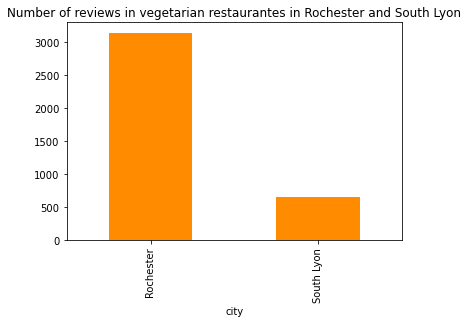

In [116]:
ax = plot_df.plot.bar(color = 'darkorange')
plt.title('Number of reviews in vegetarian restaurantes in Rochester and South Lyon')
ax.get_legend().remove()
plt.savefig('week4.png')

Based on this plot, we can hypothesise that there are more vegetarian people in Rochester. Therefore, hosting the Pumpkinfest may not influence more people to be vegetarian in South Lyon.